## ASHRAE 140-2023

Section 7: CASE 960 - Sunspace

In [1]:
import OpenSimula as osm
import pandas as pd
import numpy as np

case960_dict = {
    "name": "Case 960",
    "time_step": 3600,
    "n_time_steps": 8760,
    "initial_time": "01/01/2001 00:00:00",
    "components": [
        {
            "type": "File_met",
            "name": "Denver",
            "file_type": "TMY3",
            "file_name": "../../mets/WD100.tmy3"
        },
        {
            "type": "Material",
            "name": "Concrete_block",
            "conductivity": 0.51,
            "density": 1400,
            "specific_heat": 1000
        },
        {
            "type": "Material",
            "name": "Concrete_slab",
            "conductivity": 1.13,
            "density": 1400,
            "specific_heat": 1000
        },
        {
            "type": "Material",
            "name": "Plasterboard",
            "conductivity": 0.16,
            "density": 950,
            "specific_heat": 840
        },
        {
            "type": "Material",
            "name": "Fiberglass_quilt",
            "conductivity": 0.04,
            "density": 12,
            "specific_heat": 840
        },
        {
            "type": "Material",
            "name": "Wood_siding",
            "conductivity": 0.14,
            "density": 530,
            "specific_heat": 900
        },
        {
            "type": "Material",
            "name": "Foam_insulation",
            "conductivity": 0.04,
            "density": 10,
            "specific_heat": 1400
        },
        {
            "type": "Material",
            "name": "Insulation",
            "conductivity": 0.04,
            "density": 0.1,
            "specific_heat": 0.1
        },
        {
            "type": "Material",
            "name": "Timber_flooring",
            "conductivity": 0.14,
            "density": 650,
            "specific_heat": 1200
        },
        {
            "type": "Material",
            "name": "Roofdeck",
            "conductivity": 0.14,
            "density": 530,
            "specific_heat": 900
        },
        {
            "type": "Material",
            "name": "interior_wall_material",
            "conductivity": 0.510,
            "density": 1400,
            "specific_heat": 1000
        },
        {
            "type": "Construction",
            "name": "Wall",
            "solar_alpha": [
                0.6,
                0.6
            ],
            "materials": [
                "Wood_siding",
                "Foam_insulation",
                "Concrete_block"
            ],
            "thicknesses": [
                0.009,
                0.0615,
                0.100
            ]
        },
        {
            "type": "Construction",
            "name": "Floor",
            "solar_alpha": [
                0,
                0.6
            ],
            "materials": [
                "Insulation",
                "Concrete_slab"
            ],
            "thicknesses": [
                1.007,
                0.080
            ]
        },
        {
            "type": "Construction",
            "name": "Roof",
            "solar_alpha": [
                0.6,
                0.6
            ],
            "materials": [
                "Roofdeck",
                "Fiberglass_quilt",
                "Plasterboard"
            ],
            "thicknesses": [
                0.019,
                0.1118,
                0.010
            ]
        },
        {
            "type": "Construction",
            "name": "interior_wall_const",
            "solar_alpha": [
                0.6,
                0.6
            ],
            "materials": [
                "interior_wall_material"
            ],
            "thicknesses": [
                0.20
            ]
        },
        {
            "type": "Glazing",
            "name": "double_glazing",
            "solar_tau": 0.703,
            "solar_rho": [
                0.128,
                0.128
            ],
            "g": [
                0.769,
                0.769
            ],
            "lw_epsilon": [
                0.84,
                0.84
            ],
            "U": 2.722,
            "f_tau_nor": "-0.1175 * cos_theta**3 - 1.0295 * cos_theta**2 + 2.1354 * cos_theta",
            "f_1_minus_rho_nor": [
                "1.114 * cos_theta**3 - 3.209 * cos_theta**2 + 3.095 * cos_theta",
                "1.114 * cos_theta**3 - 3.209 * cos_theta**2 + 3.095 * cos_theta"
            ]
        },
        {
            "type": "Opening_type",
            "name": "Window",
            "glazing": "double_glazing",
            "frame_fraction": 0,
            "glazing_fraction": 1
        },
        {
            "type": "Space_type",
            "name": "constant_gain_space",
            "people_density": "0",
            "light_density": "0",
            "other_gains_density": "4.1667",
            "other_gains_radiant_fraction": 0.6,
            "infiltration": "0.5"
        },
        {
            "type": "Space_type",
            "name": "sun_zone_gains",
            "people_density": "0",
            "light_density": "0",
            "other_gains_density": "0",
            "infiltration": "0.5"
        },
        {
            "type": "Building",
            "name": "Building",
            "file_met": "Denver",
            "albedo": 0.2,
            "azimuth": 0,
            "shadow_calculation": "INSTANT"
        },
        {
            "type": "Space",
            "name": "back_zone",
            "building": "Building",
            "space_type": "constant_gain_space",
            "floor_area": 48,
            "volume": 129.6,
            "furniture_weight": 0
        },
        {
            "type": "Space",
            "name": "sun_zone",
            "building": "Building",
            "space_type": "sun_zone_gains",
            "floor_area": 16,
            "volume": 43.2,
            "furniture_weight": 0
        },
        {
            "type": "Exterior_surface",
            "name": "north_wall",
            "construction": "Wall",
            "space": "back_zone",
            "ref_point": [
                8,
                6,
                0
            ],
            "width": 8,
            "height": 2.7,
            "azimuth": 180,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "east_wall",
            "construction": "Wall",
            "space": "back_zone",
            "ref_point": [
                8,
                0,
                0
            ],
            "width": 6,
            "height": 2.7,
            "azimuth": 90,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "east_wall_2",
            "construction": "Wall",
            "space": "sun_zone",
            "ref_point": [
                8,
                -2,
                0
            ],
            "width": 2,
            "height": 2.7,
            "azimuth": 90,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "south_wall",
            "construction": "Wall",
            "space": "sun_zone",
            "ref_point": [
                0,
                -2,
                0
            ],
            "width": 8,
            "height": 2.7,
            "azimuth": 0,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Opening",
            "name": "south_window_1",
            "surface": "south_wall",
            "opening_type": "Window",
            "ref_point": [
                0.5,
                0.5
            ],
            "width": 3,
            "height": 2,
            "h_cv": [
                8.0,
                2.4
            ]
        },
        {
            "type": "Opening",
            "name": "south_window_2",
            "surface": "south_wall",
            "opening_type": "Window",
            "ref_point": [
                4.5,
                0.5
            ],
            "width": 3,
            "height": 2,
            "h_cv": [
                8.0,
                2.4
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "west_wall",
            "construction": "Wall",
            "space": "back_zone",
            "ref_point": [
                0,
                6,
                0
            ],
            "width": 6,
            "height": 2.7,
            "azimuth": -90,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "west_wall_2",
            "construction": "Wall",
            "space": "sun_zone",
            "ref_point": [
                0,
                0,
                0
            ],
            "width": 2,
            "height": 2.7,
            "azimuth": -90,
            "altitude": 0,
            "h_cv": [
                11.9,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "roof_wall",
            "construction": "Roof",
            "space": "back_zone",
            "ref_point": [
                0,
                0,
                2.7
            ],
            "width": 8,
            "height": 6,
            "azimuth": 0,
            "altitude": 90,
            "h_cv": [
                14.4,
                1.8
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "roof_wall_2",
            "construction": "Roof",
            "space": "sun_zone",
            "ref_point": [
                0,
                -2,
                2.7
            ],
            "width": 8,
            "height": 2,
            "azimuth": 0,
            "altitude": 90,
            "h_cv": [
                14.4,
                1.8
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "floor_wall",
            "construction": "Floor",
            "space": "back_zone",
            "ref_point": [
                0,
                6,
                0
            ],
            "width": 8,
            "height": 6,
            "azimuth": 0,
            "altitude": -90,
            "h_cv": [
                0.8,
                2.2
            ]
        },
        {
            "type": "Exterior_surface",
            "name": "floor_wall_2",
            "construction": "Floor",
            "space": "sun_zone",
            "ref_point": [
                0,
                0,
                0
            ],
            "width": 8,
            "height": 2,
            "azimuth": 0,
            "altitude": -90,
            "h_cv": [
                0.8,
                2.2
            ]
        },
        {
            "type": "Interior_surface",
            "name": "interior_wall",
            "construction": "interior_wall_const",
            "spaces": ["sun_zone","back_zone"],
            "ref_point": [0,0,0],
            "width": 8,
            "height": 2.7,
            "azimuth": 0,
            "altitude": 0,
            "h_cv": [
                2.2,
                2.2
            ]
        },
        {
            "type": "HVAC_perfect_system",
            "name": "system",
            "space": "back_zone",
            "file_met": "Denver",
            "outdoor_air_flow": "0",
            "heating_setpoint": "20",
            "cooling_setpoint": "27",
            "humidifying_setpoint": "0",
            "dehumidifying_setpoint": "100",
            "system_on_off": "1"
        }
    ]
}


sim = osm.Simulation()
pro = sim.new_project("pro")
pro.read_dict(case960_dict)

Reading project data from dictonary
Reading completed.
Checking project: Case 960
ok


In [2]:
pro.component("Building").show3D()

Widget(value='<iframe src="http://localhost:53029/index.html?ui=P_0x303020110_0&reconnect=auto" class="pyvista…

In [3]:
pro.simulate()

Calculating solar direct shadows ...
Calculating solar diffuse shadows ...
Simulating Case 960: ...
10%: N_iter: 2.98
20%: N_iter: 2.91
30%: N_iter: 2.73
40%: N_iter: 2.42
50%: N_iter: 2.70
60%: N_iter: 2.80
70%: N_iter: 2.86
80%: N_iter: 2.29
90%: N_iter: 2.76
100%: N_iter: 2.97
Simulation completed.


<Axes: >

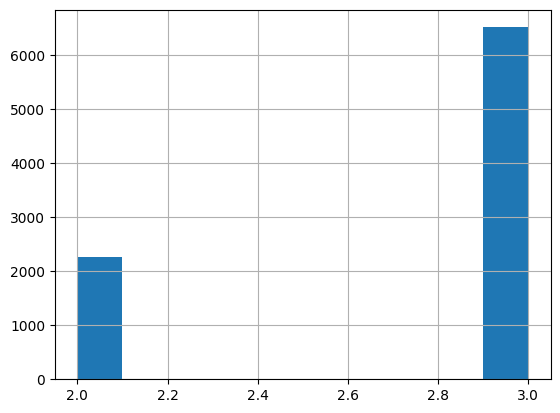

In [4]:
pro.simulation_dataframe()["n_iterations"].hist()

In [5]:
import numpy as np

# Heating and Cooling Loads
load = pro.component("back_zone").variable("system_sensible_heat").values
annual_heating = np.where(load>0,load,0).sum()/1e6
annual_cooling = np.where(load<0,-load,0).sum()/1e6
peak_heating = load.max()/1000
i_peak_heating = np.argmax(load)
peak_cooling = -load.min()/1000
i_peak_cooling = np.argmin(load)

print("Anual Heating (MWh): ", annual_heating)
print("Anual Coolling (MWh): ",annual_cooling)
print("Peak Heating (kW): ", peak_heating)
print("Peak Cooling (kW): ", peak_cooling)
print("Peak Heating Date: ",pro.dates()[i_peak_heating])
print("Peak Cooling Date: ",pro.dates()[i_peak_cooling])

Anual Heating (MWh):  2.8005531758232047
Anual Coolling (MWh):  0.8183584309533051
Peak Heating (kW):  2.0040988184696835
Peak Cooling (kW):  1.001280484921288
Peak Heating Date:  2001-02-09 05:30:00
Peak Cooling Date:  2001-06-26 16:30:00


In [6]:
# zone temperature
temp_med = pro.component("sun_zone").variable("temperature").values.mean()
temp_max = pro.component("sun_zone").variable("temperature").values.max()
temp_min = pro.component("sun_zone").variable("temperature").values.min()
i_temp_max = np.argmax(pro.component("sun_zone").variable("temperature").values)
i_temp_min = np.argmin(pro.component("sun_zone").variable("temperature").values)

print("Average Temp. (ºC): ", temp_med)
print("Min. Temp. (ºC): ", temp_min)
print("Max. Temp. (ºC): ", temp_max)
print("Min. Temp. Date: ",pro.dates()[i_temp_min])
print("Max. Temp. Date: ",pro.dates()[i_temp_max])
print("i Min: ",i_temp_min)
print("i Max: ",i_temp_max)

Average Temp. (ºC):  27.922629728346998
Min. Temp. (ºC):  4.439433912379832
Max. Temp. (ºC):  49.79177173175654
Min. Temp. Date:  2001-02-09 06:30:00
Max. Temp. Date:  2001-10-12 14:30:00
i Min:  942
i Max:  6830


In [7]:
sim.plot(pro.dates(),[pro.component("back_zone").variable("temperature"),pro.component("sun_zone").variable("temperature") ])

In [8]:
sim.plot(pro.dates(),[pro.component("interior_wall").variable("T_s0"),pro.component("interior_wall").variable("T_s1") ])

In [9]:
sim.plot(pro.dates(),[pro.component("interior_wall").variable("q_cv0"),pro.component("interior_wall").variable("q_cv1") ])

In [10]:
pro.component("sun_zone").variable_dataframe().loc[518]

date                          2001-01-22 14:30:00
temperature                             46.680353
abs_humidity                             0.999495
rel_humidity                             1.274089
people_convective                             0.0
people_radiant                                0.0
people_latent                                 0.0
light_convective                              0.0
light_radiant                                 0.0
other_gains_convective                        0.0
other_gains_radiant                           0.0
other_gains_latent                            0.0
solar_direct_gains                    5772.749738
infiltration_flow                           0.006
surfaces_convective                     16.842057
delta_int_energy                        16.842057
infiltration_sensible_heat             -180.55287
infiltration_latent_heat                -2.592059
system_sensible_heat                          0.0
system_latent_heat                            0.0


In [11]:
pro.component("north_wall").variable_dataframe().loc[941]

date           2001-02-09 05:30:00
T_s0                    -17.367036
T_s1                     15.245348
q_cd0                    18.325735
q_cd1                   -15.156185
p_0                     -13.596475
p_1                     227.280389
q_cv0                    21.027726
q_cv1                    10.460234
q_sol0                         0.0
q_sol1                        -0.0
q_swig0                        0.0
q_swig1                       -0.0
q_lwig0                        0.0
q_lwig1                   0.699306
q_lwt0                  -39.353461
q_lwt1                    3.996645
T_rm                    -25.031553
E_dir_sunny                    0.0
E_dir                          0.0
E_dif_sunny                    0.0
E_dif                          0.0
debug_f               -4920.380189
Name: 941, dtype: object